<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/16-Arboles-Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Árboles de Decisión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar el algoritmo de árboles de decisión en Python.



Los paquetes necesarios son:

In [19]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


---
## <font color='264CC7'> Ejemplo </font>

En el siguiente código, se muestra un ejemplo de cómo implementar el algoritmo de árboles de decisión en Python.

In [20]:
# Generamos los datos
iris = load_iris()
X, y = iris.data, iris.target

# Como dataframes
X = pd.DataFrame(X, columns=iris.feature_names)
y = pd.Series(y, name='species')

# Visualizar los datos
display(X.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [21]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el modelo:

In [22]:
# Crear y entrenar un arbol con ganancia de información
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Visualicemos el árbol

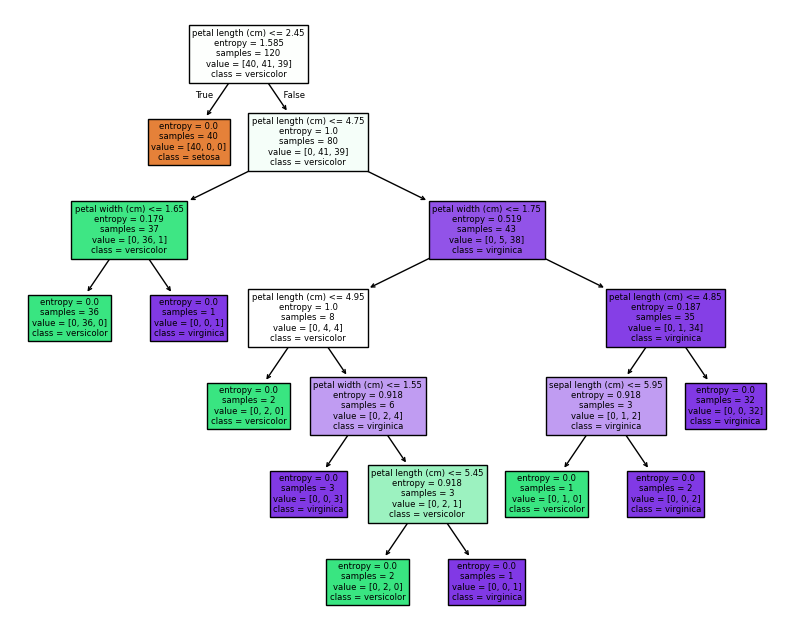

In [23]:
# Visualizar el árbol
plt.figure(figsize=(10, 8))
plot_tree(modelo, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Revisamos la precisión del modelo:

In [24]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 1.0
Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Cambia el criterio de división de `entropy` a `gini` y analiza el impacto en la precisión.
</div>
</br>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Ajusta el hiperparámetro `max_depth` a 3 y analiza el impacto en la precisión.
</div>
</br>

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [29]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
0,Bulbasaur,49,49,45,65,65,45,1
1,Ivysaur,62,63,60,80,80,60,2
2,Venusaur,82,83,80,100,100,80,3
3,Charmander,52,43,65,60,50,39,1
4,Charmeleon,64,58,80,80,65,58,2


Revisemos los datos:

In [26]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921,1.582781
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117,0.676832
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000,1.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000,1.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000,1.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000,2.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000,3.000000


Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [30]:
X = data[numeric_cols]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data['Stage'], test_size=0.2, random_state=42, stratify=data['Stage'])

### <font color='264CC7'> Modelo </font>

Entrenamos el modelo:

In [36]:
# Crear y entrenar un arbol con ganancia de información
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=4)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Visualizamos el árbol:

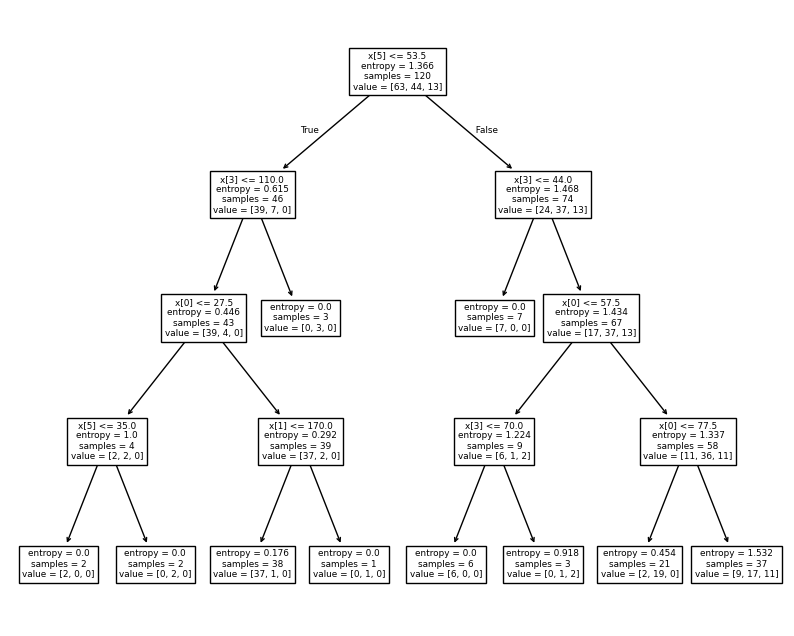

In [37]:
# Visualizar el árbol
plt.figure(figsize=(10, 8))
plot_tree(modelo)
plt.show()

Revisamos la precisión del modelo:

In [38]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.74
Matriz de confusión:
[[11  3  2]
 [ 0 12  0]
 [ 0  3  0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.67      1.00      0.80        12
           3       0.00      0.00      0.00         3

    accuracy                           0.74        31
   macro avg       0.56      0.56      0.54        31
weighted avg       0.77      0.74      0.73        31

